In [1]:
# this notebook adds additional features to the main bulk of the game data

In [2]:
import pandas as pd

In [3]:
# get games data for last few years
games_0 = pd.read_excel('data/nhl_game_results_2023.xlsx', header=0)
games_1 = pd.read_excel('data/nhl_game_results_2024.xlsx', header=0)
games_2 = pd.read_excel('data/nhl_game_results_2025.xlsx', header=0)

# union together
all_games = pd.concat([games_0, games_1, games_2], ignore_index=True)

# reset index
all_games.reset_index(drop=True, inplace=True)

# create Game_ID column
all_games["Game_ID"] = (
    all_games["Date"].dt.strftime("%Y-%m-%d") + "-" +
    all_games["Time"].astype(str) + "|" +
    all_games["Home Team"].astype(str) + " vs " +
    all_games["Away Team"].astype(str)
)

# inspect
all_games.info()
all_games.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3349 entries, 0 to 3348
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Game Link      3349 non-null   object        
 1   Extra Time     3349 non-null   object        
 2   Home Team      3349 non-null   object        
 3   Away Team      3349 non-null   object        
 4   Home Score     3349 non-null   int64         
 5   Away Score     3349 non-null   int64         
 6   P1 Home Score  3349 non-null   int64         
 7   P1 Away Score  3349 non-null   int64         
 8   P2 Home Score  3349 non-null   int64         
 9   P2 Away Score  3349 non-null   int64         
 10  P3 Home Score  3349 non-null   int64         
 11  P3 Away Score  3349 non-null   int64         
 12  P4 Home Score  3349 non-null   int64         
 13  P4 Away Score  3349 non-null   int64         
 14  P5 Home Score  3349 non-null   int64         
 15  P5 Away Score  3349 n

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,P5 Away Score,P6 Home Score,P6 Away Score,P7 Home Score,P7 Away Score,Date,Time,Year,Total Score,Game_ID
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,0,0,0,0,0,2023-06-24,20:00,2023,3,2023-06-24-20:00|Florida Panthers vs Edmonton ...
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,0,0,0,0,0,2023-06-21,20:00,2023,6,2023-06-21-20:00|Edmonton Oilers vs Florida Pa...
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,0,0,0,0,0,2023-06-18,20:00,2023,8,2023-06-18-20:00|Florida Panthers vs Edmonton ...
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,0,0,0,0,0,2023-06-15,20:00,2023,9,2023-06-15-20:00|Edmonton Oilers vs Florida Pa...
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,0,0,0,0,0,2023-06-13,20:00,2023,7,2023-06-13-20:00|Edmonton Oilers vs Florida Pa...


In [4]:
# calc score at end of regular time
all_games['regular_time_score_total'] = all_games['Home Score'] + all_games['Away Score']
all_games['regular_time_score_home'] = all_games['P1 Home Score'] + all_games['P2 Home Score'] + all_games['P3 Home Score']
all_games['regular_time_score_away'] = all_games['P1 Away Score'] + all_games['P2 Away Score'] + all_games['P3 Away Score']

# calc win draw tie for regular time
all_games['Reg_Home_Win'] = all_games['regular_time_score_home'] > all_games['regular_time_score_away']
all_games['Reg_Away_Win'] = all_games['regular_time_score_home'] < all_games['regular_time_score_away']
all_games['Reg_Tie'] = all_games['regular_time_score_home'] == all_games['regular_time_score_away']

# add cols for showing the winning team at full time
all_games['FT_Home_Win'] = all_games['Home Score'] > all_games['Away Score']
all_games['FT_Away_Win'] = all_games['Home Score'] < all_games['Away Score']

# inspect
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,Total Score,Game_ID,regular_time_score_total,regular_time_score_home,regular_time_score_away,Reg_Home_Win,Reg_Away_Win,Reg_Tie,FT_Home_Win,FT_Away_Win
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,3,2023-06-24-20:00|Florida Panthers vs Edmonton ...,3,2,1,True,False,False,True,False
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,6,2023-06-21-20:00|Edmonton Oilers vs Florida Pa...,6,5,1,True,False,False,True,False
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,8,2023-06-18-20:00|Florida Panthers vs Edmonton ...,8,3,5,False,True,False,False,True
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,9,2023-06-15-20:00|Edmonton Oilers vs Florida Pa...,9,8,1,True,False,False,True,False
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,7,2023-06-13-20:00|Edmonton Oilers vs Florida Pa...,7,3,4,False,True,False,False,True


In [5]:
# extract day of wee and month from date cols
all_games['Day_of_Week'] = all_games['Date'].dt.day_name()
all_games['Month'] = all_games['Date'].dt.month_name()
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,regular_time_score_total,regular_time_score_home,regular_time_score_away,Reg_Home_Win,Reg_Away_Win,Reg_Tie,FT_Home_Win,FT_Away_Win,Day_of_Week,Month
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,3,2,1,True,False,False,True,False,Saturday,June
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,6,5,1,True,False,False,True,False,Wednesday,June
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,8,3,5,False,True,False,False,True,Sunday,June
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,9,8,1,True,False,False,True,False,Thursday,June
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,7,3,4,False,True,False,False,True,Tuesday,June


In [ ]:
# TODO: identify generally when pre-season and post-season games occur; really only want to focus on regular season
# preseason ususally ends after 1st week of october and then regular season ends early to mid-april


In [7]:
# assign each team to its respective conference and division

# read in conf and div info
conf_map = pd.read_excel('data/NHL Team Conf Div 2025.xlsx', header=0, sheet_name='Conf')
div_map = pd.read_excel('data/NHL Team Conf Div 2025.xlsx', header=0, sheet_name='Div')

# inspect
print(conf_map.head(), '\n')
print(div_map.head())

                 Team Conference
0  Colorado Avalanche    Western
1       Anaheim Ducks    Western
2        Dallas Stars    Western
3  Chicago Blackhawks    Western
4       Winnipeg Jets    Western 

                  Team  Division
0   Montreal Canadiens  Atlantic
1        Boston Bruins  Atlantic
2  Toronto Maple Leafs  Atlantic
3      Ottawa Senators  Atlantic
4  Tampa Bay Lightning  Atlantic


In [8]:
# map home and away conf and div
all_games = all_games.merge(conf_map.rename(columns={'Team':'Home Team', 'Conference':'Home Conf'}), on='Home Team', how='left')
all_games = all_games.merge(conf_map.rename(columns={'Team':'Away Team', 'Conference':'Away Conf'}), on='Away Team', how='left')
all_games = all_games.merge(div_map.rename(columns={'Team':'Home Team', 'Division':'Home Div'}), on='Home Team', how='left')
all_games = all_games.merge(div_map.rename(columns={'Team':'Away Team', 'Division':'Away Div'}), on='Away Team', how='left')

# inspect
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,Reg_Away_Win,Reg_Tie,FT_Home_Win,FT_Away_Win,Day_of_Week,Month,Home Conf,Away Conf,Home Div,Away Div
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,False,False,True,False,Saturday,June,Eastern,Western,Atlantic,Pacific
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,False,False,True,False,Wednesday,June,Western,Eastern,Pacific,Atlantic
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,True,False,False,True,Sunday,June,Eastern,Western,Atlantic,Pacific
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,False,False,True,False,Thursday,June,Western,Eastern,Pacific,Atlantic
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,True,False,False,True,Tuesday,June,Western,Eastern,Pacific,Atlantic


In [9]:
# create conf and div cols
all_games['Conf_Matchup'] = all_games['Home Conf'] == all_games['Away Conf']
all_games['Div_Matchup'] = all_games['Home Div'] == all_games['Away Div']

# create col that concats home and away conf then repeat for div
all_games['Conf_Pair'] = all_games['Home Conf'] + "-" + all_games['Away Conf']
all_games['Div_Pair'] = all_games['Home Div'] + "-" + all_games['Away Div']

# inspect
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,Day_of_Week,Month,Home Conf,Away Conf,Home Div,Away Div,Conf_Matchup,Div_Matchup,Conf_Pair,Div_Pair
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,Saturday,June,Eastern,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,Wednesday,June,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,Sunday,June,Eastern,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,Thursday,June,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,Tuesday,June,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic


In [10]:
# create home vs away pair
all_games['Team_Pair'] = all_games['Home Team'] + " vs " + all_games['Away Team']
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,Month,Home Conf,Away Conf,Home Div,Away Div,Conf_Matchup,Div_Matchup,Conf_Pair,Div_Pair,Team_Pair
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,June,Eastern,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific,Florida Panthers vs Edmonton Oilers
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,June,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,June,Eastern,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific,Florida Panthers vs Edmonton Oilers
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,June,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,June,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers


<Axes: >

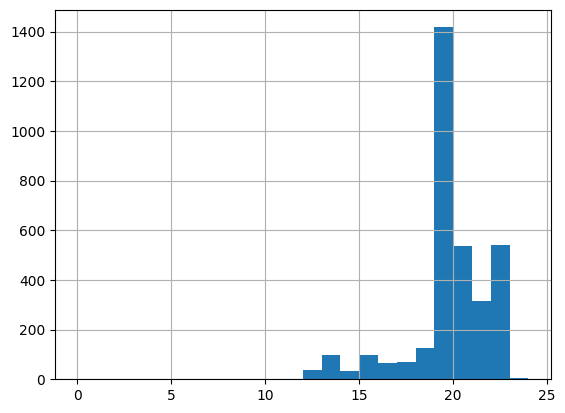

In [11]:
# split out hour part of time and get histogram of game start hours
all_games['Game_Start_Hour'] = all_games['Time'].str.split(':').str[0].astype(int)
all_games['Game_Start_Hour'].hist(bins=range(0,25))

In [17]:
# classify game time start hour
def classify_start_hour(hour):
    if 2 <= hour < 15:
        return 'Early'
    elif 15 <= hour < 20:
        return 'Mid'
    elif 20 <= hour < 24 or hour <= 1:
        return 'Late'
    else:
        return 'Unknown'

all_games['Start_Hour_Group'] = all_games['Game_Start_Hour'].apply(classify_start_hour)
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,Away Conf,Home Div,Away Div,Conf_Matchup,Div_Matchup,Conf_Pair,Div_Pair,Team_Pair,Game_Start_Hour,Start_Hour_Group
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific,Florida Panthers vs Edmonton Oilers,20,Late
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers,20,Late
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific,Florida Panthers vs Edmonton Oilers,20,Late
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers,20,Late
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers,20,Late


In [19]:
all_games['Start_Hour_Group'].value_counts()

Start_Hour_Group
Mid      1775
Late     1401
Early     173
Name: count, dtype: int64

In [ ]:
# inspect basic stats for numeric cols
all_games.describe()

In [ ]:
# inspect disttribution of Total Score using histogram
all_games['Total Score'].hist(bins=10)

In [ ]:
# Add Logic to determine Home Win or Not
